# Data Mining - Sommersemester 2024
Diren Can Akkaya: s0588821
Vanja Milanovic: s0588888

## Rossmann - Sales Prediction

Im Rahmen unseres semesterbegleitenden Projekts besteht unsere Aufgabe darin, die Verkaufszahlen der Drogeriekette Rossmann vorherzusagen. Rossmann betreibt über 3000 Filialen in sieben europäischen Ländern und steht vor der Herausforderung, tägliche Verkaufszahlen bis zu sechs Wochen im Voraus zu prognostizieren. Diese Aufgabe, die derzeit von den einzelnen Filialleitern übernommen wird, wird von zahlreichen Faktoren beeinflusst, darunter Werbeaktionen, Konkurrenz, Schul- und Feiertage, Saisonalität und die spezifischen Gegebenheiten der jeweiligen Region. Angesichts der unterschiedlichen Bedingungen und subjektiven Ansätze der vielen Filialleiter variiert die Genauigkeit dieser Verkaufsprognosen erheblich.

Unser Projekt zielt darauf ab, die Verkaufszahlen für 1115 Filialen in ganz Deutschland vorherzusagen. Um dies zu erreichen werden wir geeignete Modelle auswählen, darunter Regressionsmodelle, Klassifikationsmodelle und Clustering-Ansätze. Die Validierung der ausgewählten Modelle wird ein wesentlicher Bestandteil unseres Projekts sein, um sicherzustellen, dass die Vorhersagen zuverlässig und möglichst genau sind. Darüber hinaus werden wir wichtige Parameter identifizieren, die die Verkaufszahlen beeinflussen, und diese in unsere Vorhersagemodelle integrieren. 

### Import der relevanten Bibliotheken

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

### 1. Deksriptive Analyse der Daten
Im deskriptiven Teil unseres Projekts werden wir zunächst eine detaillierte Analyse der vorhandenen Verkaufsdaten von Rossmann durchführen. Dies umfasst die Untersuchung von Mustern und Trends in den Verkaufszahlen, die Identifizierung von saisonalen Schwankungen sowie die Analyse von Einflüssen durch Werbeaktionen, Feiertage und regionale Unterschiede. Diese deskriptive Analyse bildet die Grundlage für ein besseres Verständnis der Datenstruktur und der relevanten Einflussfaktoren, die später in die Modellierung der Verkaufsprognosen einfließen werden.

In [61]:
train_df = pd.read_csv("resources/train_df.csv")
train_df.head()

C:\Users\Diren\AppData\Local\Temp\ipykernel_13208\2991713894.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("resources/train_df.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [62]:
train_df.shape

(1017209, 9)

In [63]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Der Train-Datensatz, der für die Verkaufsprognose von Rossmann verwendet wird, enthält insgesamt neun Merkmale. Diese Merkmale setzen sich aus sieben numerischen Merkmalen des Datentyps Integer und zwei Merkmalen des Datentyps String zusammen.

In [64]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [65]:
train_df["Date"] = pd.to_datetime(train_df["Date"], format="%Y-%m-%d")
train_df["Year"] = train_df["Date"].dt.year

train_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015


In [66]:
train_df["Year"].unique()

array([2015, 2014, 2013], dtype=int32)

In [67]:
train_df["Date"].min()


Timestamp('2013-01-01 00:00:00')

In [68]:
train_df["Date"].max()

Timestamp('2015-07-31 00:00:00')

In [69]:
train_df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Das Merkmal "StateHoliday" ist anders als "SchoolHoliday" vom Datentyp String. 0 bedeutet, dass kein staatlicher Feiertag vorliegt. a steht für öffentliche Ferien, b für Osterferien und c für Weihnachten. Das Merkmal wird mittels One-Hot-Encoding in mehrere binäre Merkmale umgewandelt, wobei für jede Kategorie eine eigene Spalte erstellt wird (z.B. für 0, a, b und c).

In [70]:
from sklearn.preprocessing import LabelEncoder

#Zunächst müssen die Werte als Strings behandelt werden
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)
label_encoder = LabelEncoder()
train_df['StateHoliday'] = label_encoder.fit_transform(train_df['StateHoliday']) 
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015


In [71]:
train_df["StateHoliday"].unique()

array([0, 1, 2, 3])

In [72]:
train_df["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [73]:
train_df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

## Visualisierung

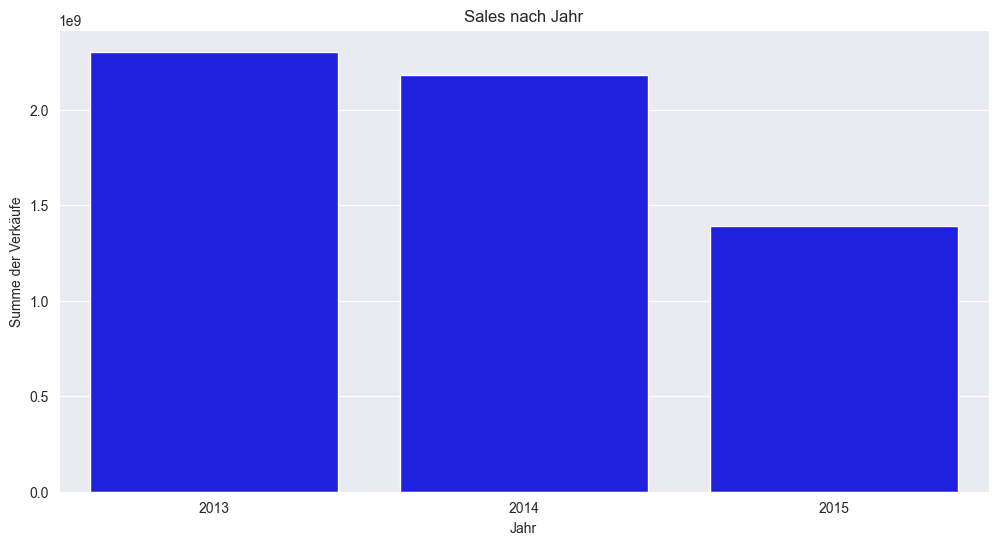

In [74]:
sales_sum = train_df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_sum.index , y=sales_sum.values, color="blue")
plt.xlabel("Jahr")
plt.ylabel("Summe der Verkäufe")
plt.title("Sales nach Jahr")
plt.show()

In [75]:
train_df['Year'].value_counts().sort_index()

Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

Datensätze mit den Jahren 2015 kommen häufiger vor. Ggf. kann man dem aber mit der Kreuzvalidierung entgegenwirken.

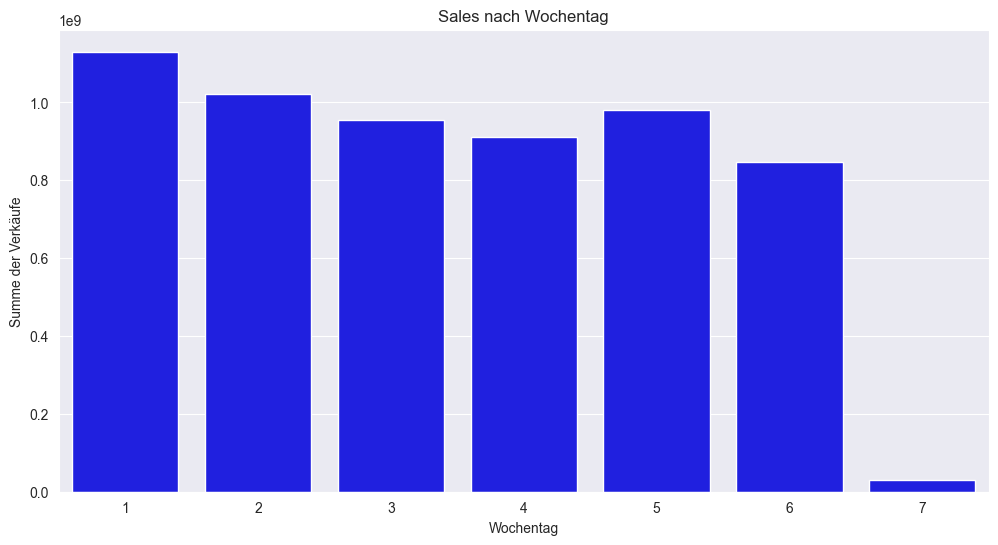

In [76]:
sales_sum = train_df.groupby("DayOfWeek")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_sum.index , y=sales_sum.values, color="blue")
plt.xlabel("Wochentag")
plt.ylabel("Summe der Verkäufe")
plt.title("Sales nach Wochentag")
plt.show()

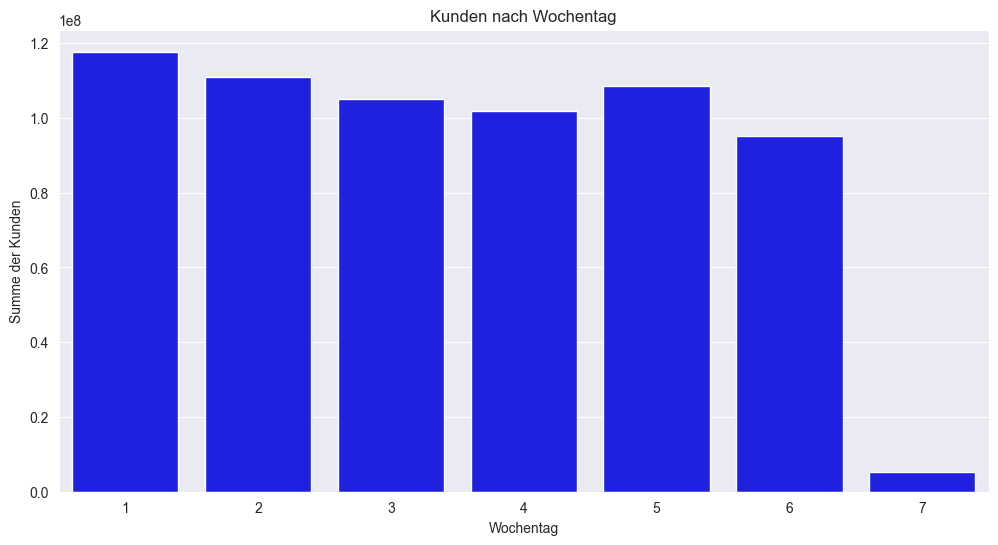

In [77]:
customer_sum = train_df.groupby("DayOfWeek")["Customers"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=customer_sum.index, y= customer_sum.values, color="blue")
plt.xlabel("Wochentag")
plt.ylabel("Summe der Kunden")
plt.title("Kunden nach Wochentag")
plt.show()

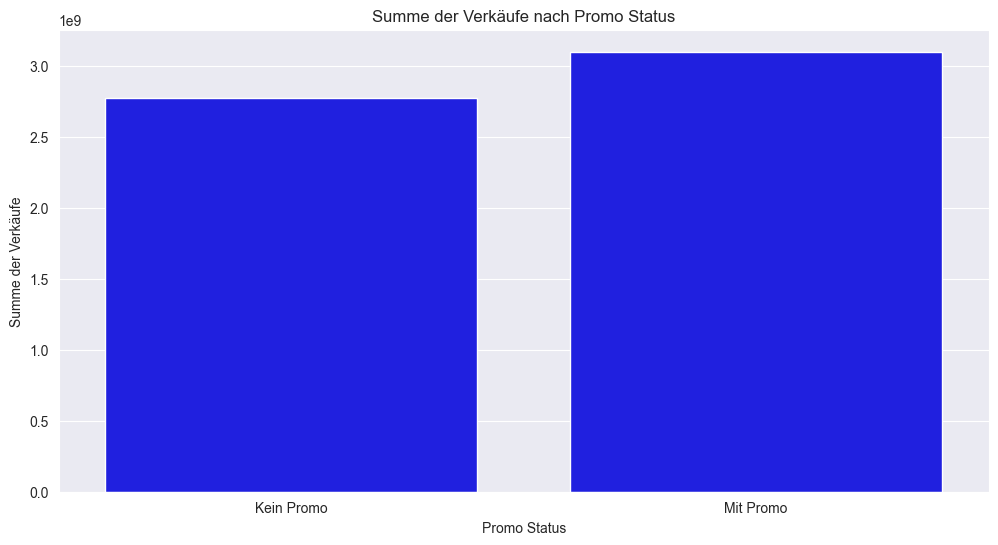

In [78]:
sales_per_promo = train_df.groupby("Promo")["Sales"].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=sales_per_promo.index, y=sales_per_promo.values, color="blue")
plt.xlabel("Promo Status")
plt.ylabel("Summe der Verkäufe")
plt.title("Summe der Verkäufe nach Promo Status")
plt.xticks(ticks=[0,1], labels=["Kein Promo", "Mit Promo"])
plt.show()

## Prüfen der "Noisiness" und Bereinigung
In diesem Abschnitt prüfen wir die Daten in Bezug auf die "Noisiness". Das heißt genauer, dass die Daten auf Ausreißer, doppelte Datenreihen und generelle Unstimmigkeiten geprüft werden.

### Train Datensatz

Wir zählen die doppelten Reihen

In [79]:
#Prüfen, ob und wie viele doppelte Reihen existieren.
duplicateRow  = train_df.duplicated()
countDuplicate = duplicateRow.sum() #Zählen der doppelten Reihen

print("Anzahl der doppelten Reihen: " , countDuplicate)

Anzahl der doppelten Reihen:  0


Der Datensatz beinhaltet keine doppelten Reihen.

Wir prüfen, ob es Tage gibt, an denen die Stores zwar offen waren, aber keine Umsätze/Kunden vorhanden sind.

In [80]:
# Anzahl der Anomalien überprüfen und ausgeben
open_count = train_df[(train_df["Open"] == 1) & ((train_df["Sales"] == 0) | (train_df["Customers"] == 0))].shape[0]
print(open_count)

54


In [81]:
train_df[(train_df["Open"] == 1) & ((train_df["Sales"] == 0) | (train_df["Customers"] == 0))]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year
86825,971,5,2015-05-15,0,0,1,0,0,1,2015
142278,674,4,2015-03-26,0,0,1,0,0,0,2015
196938,699,4,2015-02-05,0,0,1,1,0,0,2015
322053,708,3,2014-10-01,0,0,1,1,0,0,2014
330176,357,1,2014-09-22,0,0,1,0,0,0,2014
340348,227,4,2014-09-11,0,0,1,0,0,0,2014
340860,835,4,2014-09-11,0,0,1,0,0,0,2014
341795,835,3,2014-09-10,0,0,1,0,0,0,2014
346232,548,5,2014-09-05,0,0,1,1,0,1,2014
346734,28,4,2014-09-04,0,0,1,1,0,0,2014


Kommentar: Hier würde ich bevor wir die Datensätze löschen nochmal die Tabelle mit den Daten ausgeben lassen um zu schauen an welchen Tagen die Läden keine Umsätze gemacht haben.

Diese 54 Datensätze löschen wir nun aus der train.csv.

In [82]:
train_df = train_df.drop(train_df[(train_df["Open"] == 1) & ((train_df["Sales"] == 0) | (train_df["Customers"] == 0))].index)

Nun prüfen wir ebenso, ob ein Store geschlossen war, aber dennoch Kunden/Umsätze vorhanden sind.

In [83]:
closed_count = train_df[(train_df["Open"] == 0) & ((train_df["Sales"] > 0) | (train_df["Customers"] > 0))].shape[0]
print(closed_count)

0


Es gibt keine Läden, die geschlossen waren und gleichzeitig keine Umsätze oder Besucher an diesen Tagen hatten

Wir vermuten, ausgehend vom Notebook von Elena ([Elena]. ([19.07.2017]). [train.csv]. [Rossmann Store Sales 2024]), dass die geschlossenen Stores unseren Modellen keinen Mehrwert bieten bzw. sogar das Ergebnis verzerren könnten.
Dementsprechend entfernen wir alle geschlossenen Stores aus dem Datensatz.

In [84]:
train_df[train_df["Open"] == 0].shape[0]

172817

Die 172817 Reihen werden nun entfernt.

In [85]:
#train_df = train_df[train_df["Open"] != 0]
train_df = train_df.drop(train_df[train_df["Open"] == 0].index)
train_df[train_df["Open"] == 0].shape[0]

0

### Store Datensatz

In [86]:
store_df = pd.read_csv("resources/store_df.csv")

In [87]:
store_df.shape

(1115, 10)

In [88]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [89]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [90]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [91]:
#Wir befüllen die Zeilen mit fehlenden Werten mit 0
store_df["Promo2SinceWeek"] = store_df["Promo2SinceWeek"].fillna(0)
store_df["Promo2SinceYear"] = store_df["Promo2SinceYear"].fillna(0)
store_df["PromoInterval"] = store_df["PromoInterval"].fillna("None")

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [92]:
store_df["CompetitionDistance"] = store_df["CompetitionDistance"].fillna(0)
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [93]:
store_df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

store_df["StoreType"] = label_encoder.fit_transform(store_df["StoreType"])
store_df["Assortment"] = label_encoder.fit_transform(store_df["Assortment"])

In [95]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,None


Wir zählen die doppelten Reihen

In [96]:
#Prüfen, ob und wie viele doppelte Reihen gibt.
duplicateRow  = store_df.duplicated()
countDuplicate = duplicateRow.sum() #Zählen der doppelten Reihen

print("Anzahl der doppelten Reihen: " , countDuplicate)

Anzahl der doppelten Reihen:  0


Der Datensatz beinhaltet keine doppelten Reihen.

## Datensätze mergen und deskriptive Analyse

Wir joinen die Datensätze "train.csv" und "store.csv" auf Basis der Spalte "Store". Diese Spalte dient also ausgehend von der Beschreibung auf Kaggle als PrimaryKey (Rossmann Store Sales 2024).
("Store - a unique Id for each store")

In [97]:
#Mergen der Tabellen (https://pandas.pydata.org/docs/user_guide/merging.html)
merged_df = pd.merge(train_df,store_df, on="Store")

merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2,0,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,2,2,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,0,0,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,2013-01-01,3375,566,1,0,1,1,2013,1,0,150.0,9.0,2006.0,0,0.0,0.0,None
844334,733,2,2013-01-01,10765,2377,1,0,1,1,2013,1,1,860.0,10.0,1999.0,0,0.0,0.0,None
844335,769,2,2013-01-01,5035,1248,1,0,1,1,2013,1,1,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,2013-01-01,4491,1039,1,0,1,1,2013,1,1,1430.0,NaN,NaN,0,0.0,0.0,None


### Korrealtion zwischen den Features bestimmen (und weitere analyse)
Eine Korrelationsmatrix hilft uns ein besseres Verständnis über die Features zu erhalten und ggf. redundante Features zu entfernen(bspw. wenn zwei verschiedene Features mit demselben Feature ähnlich korrelieren), um so die Performance unseres Notebooks und der Modelle zu verbessern.

In [98]:
#pearson korr
correlation_matrix = merged_df[["Sales","Customers", "CompetitionDistance"]].corr()
correlation_matrix = correlation_matrix.round(4)

print("Pearson-Korrelation zwischen Sales und Customers:")
print(correlation_matrix)

Pearson-Korrelation zwischen Sales und Customers:
                      Sales  Customers  CompetitionDistance
Sales                1.0000     0.8236              -0.0355
Customers            0.8236     1.0000              -0.1474
CompetitionDistance -0.0355    -0.1474               1.0000


Die Korrelation der beiden Features "Sales" und "Customers" ist sehr hoch. Es würde reichen, wenn wir eines dieser Merkmale beibehalten oder aus beiden Features ein neues erstellen.

### Scatterplots

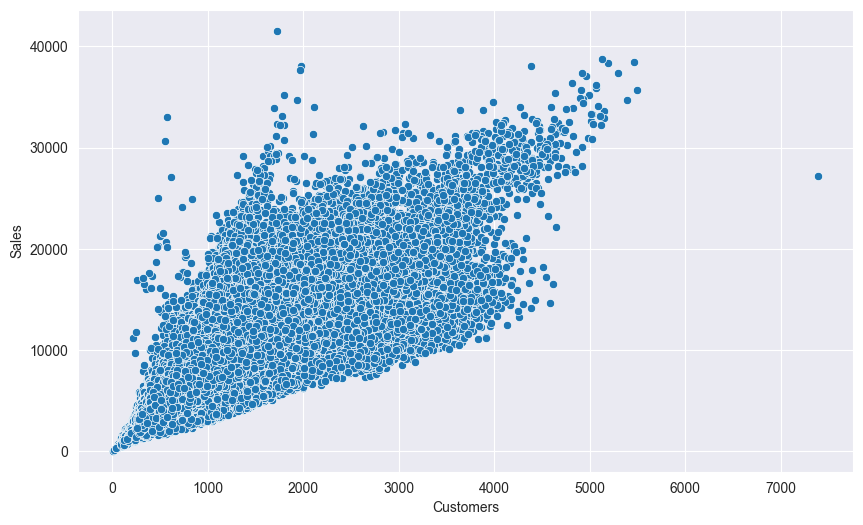

In [99]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Customers", y="Sales", data=merged_df)
plt.show()

### Pairplot

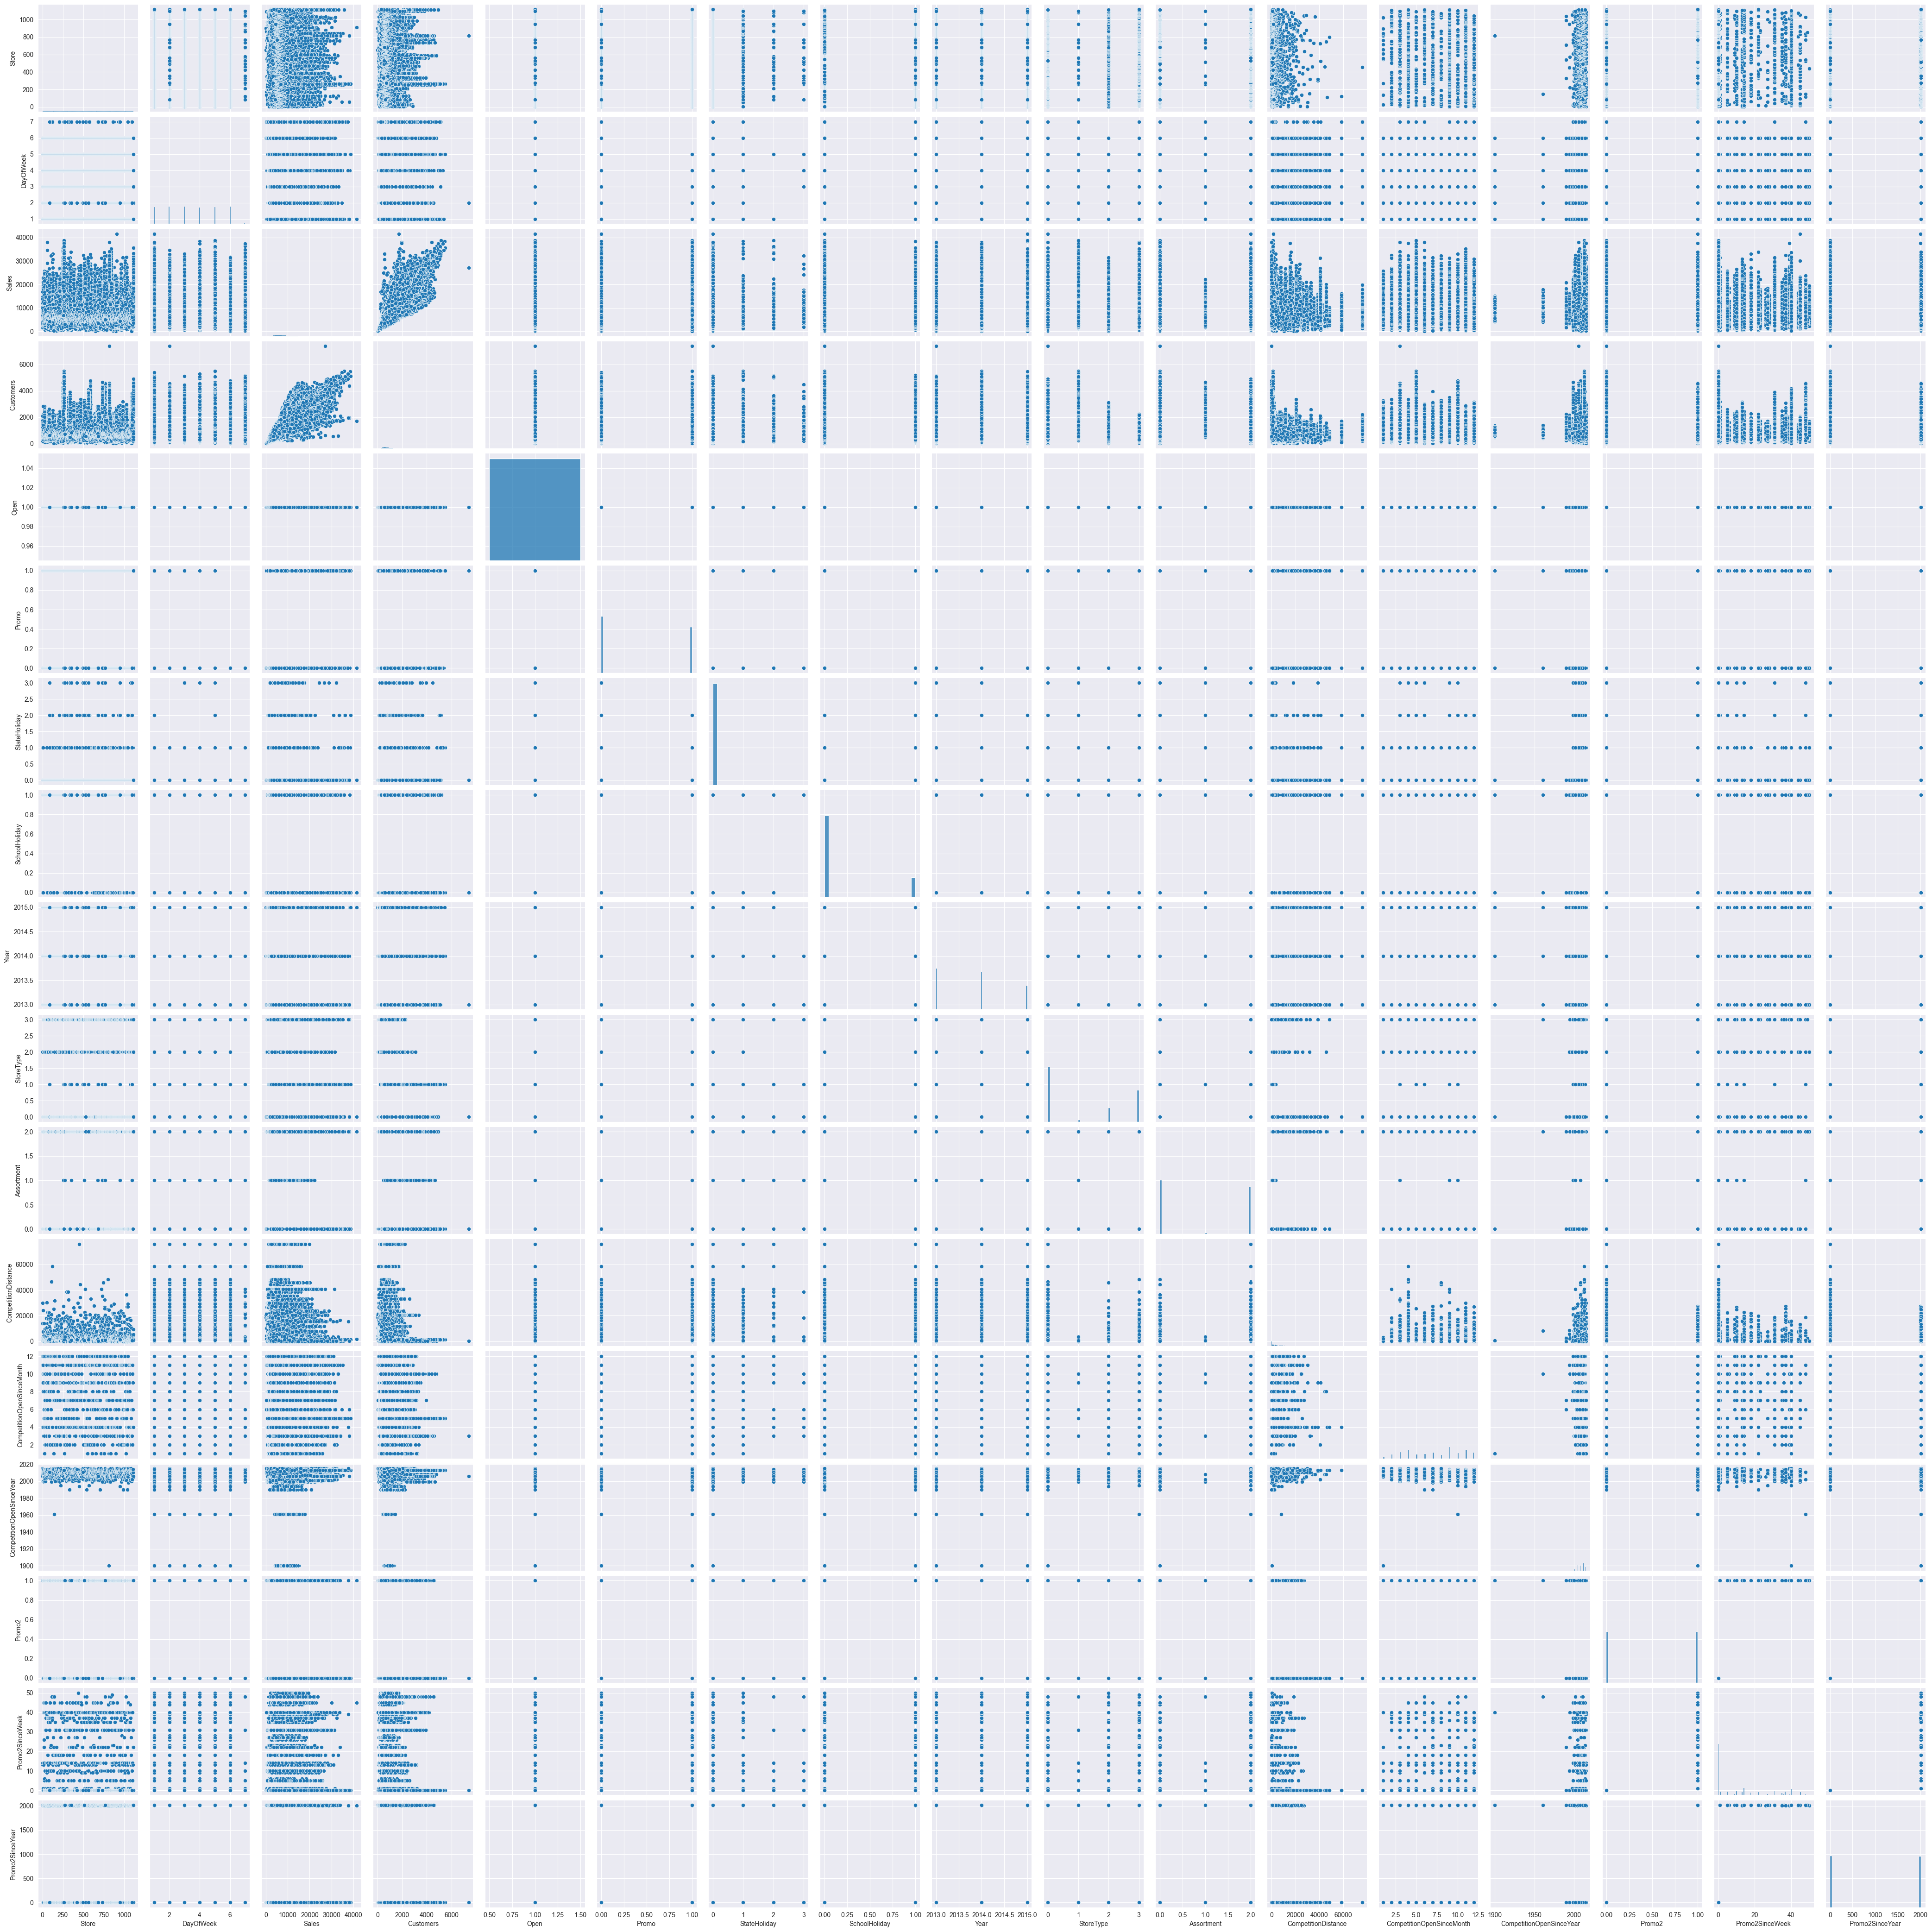

In [100]:
sns.pairplot(merged_df)
plt.show()

### Heatmap der Korrelationsmatrix
Für die Korrelationsberechnung müssen wir die Features Encoden (Label oder One Hot)

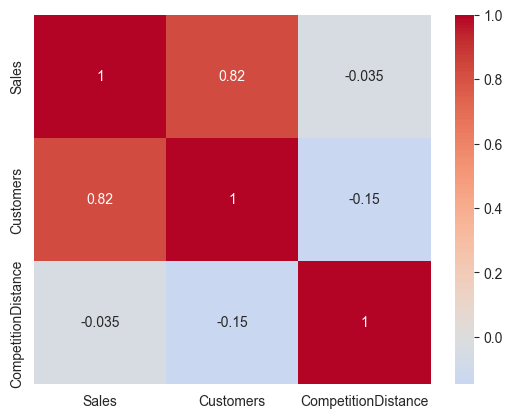

In [101]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

### Boxplots

Sales x StoreType

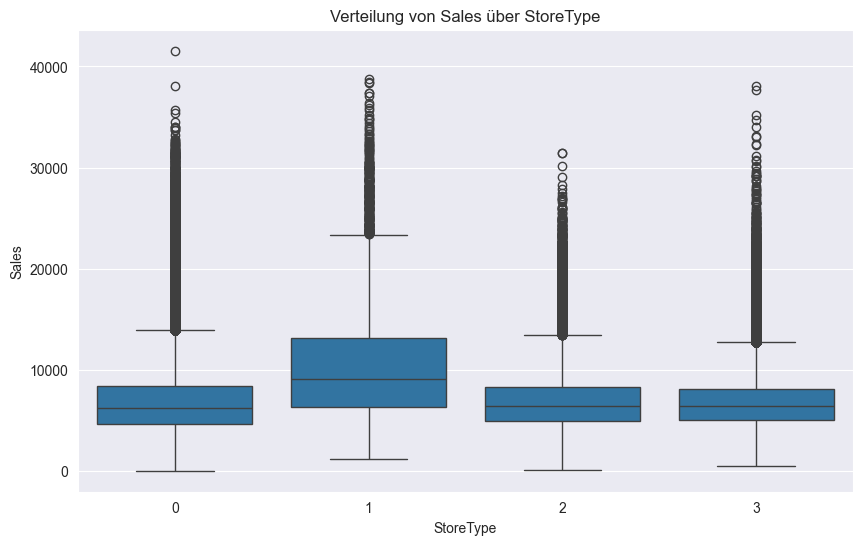

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="StoreType", y="Sales", data=merged_df)
plt.title("Verteilung von Sales über StoreType")
plt.show()

Geschäftstyp '1' weist im Vergleich zu den anderen Geschäftstypen im Allgemeinen höhere und variablere Verkaufszahlen auf.

Sales x Assortment

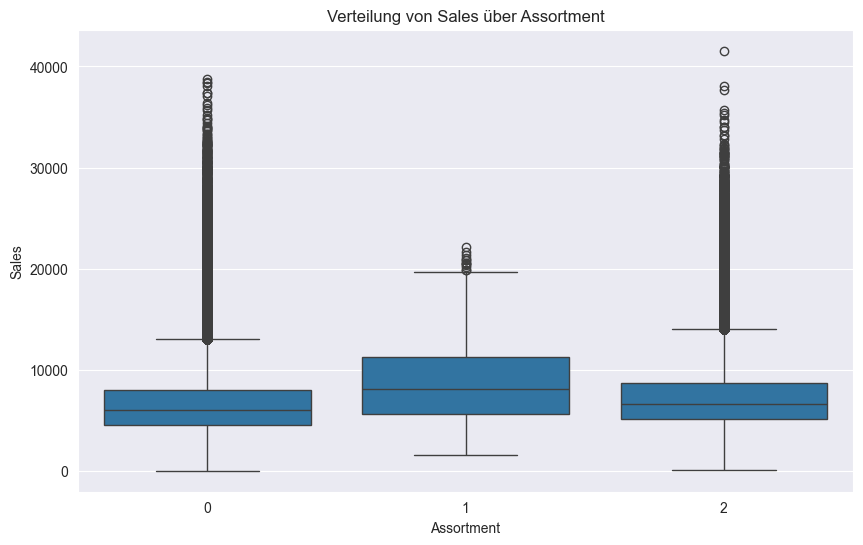

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Assortment", y="Sales", data=merged_df)
plt.title("Verteilung von Sales über Assortment")
plt.show()

Assortmenttyp '1' weist im Vergleich zu den anderen Assortmenttypen im Allgemeinen höhere und variablere Verkaufszahlen auf.

## Feature Extraktion und Bereinigung des gemergten Datensatzes
Weitere Features dienen dazu genauere Modelle zu trainieren. Dementsprechend werden wir, angelehnt an der Checkliste von (Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems, S.758) eine erste Auswahl an Features treffen, die für die Modelle sinnvoll erscheinen und bei unzufriedener Performance iterativ neue Features wählen bzw. Features entfernen.

#### Wir extrahieren aus der Spalte "Date" die Spalten "Day", "Month" und "Year", um so ggf. saisonale Muster zu erkennen.

In [104]:
#Day
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df["Day"] = merged_df["Date"].dt.day
merged_df.insert(2, 'Day', merged_df.pop('Day'))

#Month
merged_df["Month"] = merged_df["Date"].dt.month
merged_df.insert(3, 'Month', merged_df.pop('Month'))

#Year
merged_df["Year"] = merged_df["Date"].dt.year
merged_df.insert(4, 'Year', merged_df.pop('Year'))


merged_df

,Store,DayOfWeek,Day,Month,Year,Date,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31,7,2015,2015-07-31,5263,555,1,1,...,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,31,7,2015,2015-07-31,6064,625,1,1,...,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31,7,2015,2015-07-31,8314,821,1,1,...,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31,7,2015,2015-07-31,13995,1498,1,1,...,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,31,7,2015,2015-07-31,4822,559,1,1,...,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,1,1,2013,2013-01-01,3375,566,1,0,...,1,1,0,150.0,9.0,2006.0,0,0.0,0.0,None
844334,733,2,1,1,2013,2013-01-01,10765,2377,1,0,...,1,1,1,860.0,10.0,1999.0,0,0.0,0.0,None
844335,769,2,1,1,2013,2013-01-01,5035,1248,1,0,...,1,1,1,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,1,1,2013,2013-01-01,4491,1039,1,0,...,1,1,1,1430.0,NaN,NaN,0,0.0,0.0,None


#### Binärfeature das anzeigt, ob Promo2 aktiv ist (also momentan stattfindet).

In [105]:
# Dict für Monatsnamen auf Zahlen
month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
             "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}

# Promo2Active berechnen
def is_promo2_active(row):
    if row["Promo2"] == 1:
        # Wandelt die Monatsnamen in Zahlen um und überprüft, ob der aktuelle Monat in PromoInterval enthalten ist
        promo_months = [month_map[m] for m in row["PromoInterval"].split(",") if m in month_map]
        if row["Month"] in promo_months:
            return 1
    return 0

merged_df["Promo2Active"] = merged_df.apply(is_promo2_active, axis=1)
merged_df.insert(18, "Promo2Active", merged_df.pop("Promo2Active"))

merged_df

,Store,DayOfWeek,Day,Month,Year,Date,Sales,Customers,Open,Promo,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2Active,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31,7,2015,2015-07-31,5263,555,1,1,...,2,0,1270.0,9.0,2008.0,0,0,0.0,0.0,None
1,2,5,31,7,2015,2015-07-31,6064,625,1,1,...,0,0,570.0,11.0,2007.0,1,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31,7,2015,2015-07-31,8314,821,1,1,...,0,0,14130.0,12.0,2006.0,1,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31,7,2015,2015-07-31,13995,1498,1,1,...,2,2,620.0,9.0,2009.0,0,0,0.0,0.0,None
4,5,5,31,7,2015,2015-07-31,4822,559,1,1,...,0,0,29910.0,4.0,2015.0,0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,1,1,2013,2013-01-01,3375,566,1,0,...,1,0,150.0,9.0,2006.0,0,0,0.0,0.0,None
844334,733,2,1,1,2013,2013-01-01,10765,2377,1,0,...,1,1,860.0,10.0,1999.0,0,0,0.0,0.0,None
844335,769,2,1,1,2013,2013-01-01,5035,1248,1,0,...,1,1,840.0,NaN,NaN,1,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,1,1,2013,2013-01-01,4491,1039,1,0,...,1,1,1430.0,NaN,NaN,0,0,0.0,0.0,None


Wir entfernen die Features "PromoInterval" und "Promo2".

In [106]:
merged_df = merged_df.drop(columns="Promo2")
merged_df = merged_df.drop(columns=["PromoInterval"])
merged_df.head()

,Store,DayOfWeek,Day,Month,Year,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2Active,Promo2SinceWeek,Promo2SinceYear
0,1,5,31,7,2015,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0
1,2,5,31,7,2015,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,31,7,2015,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,31,7,2015,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0
4,5,5,31,7,2015,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0


Wir fügen das Feature "CompetitionOpenSince" hinzu. Dieses Feature gibt an, seit wie vielen Jahren die Konkurrenz geöffnet hat.

In [107]:
merged_df["CompetitionOpenSinceYears"] = merged_df["Year"] - merged_df["CompetitionOpenSinceYear"]
merged_df.insert(15, "CompetitionOpenSinceYears", merged_df.pop("CompetitionOpenSinceYears"))
merged_df["CompetitionOpenSinceYears"].fillna(0, inplace=True) #Die nAn die dabei entstehen ersetzen wir mi 0

merged_df.head()

C:\Users\Diren\AppData\Local\Temp\ipykernel_13208\3873464272.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["CompetitionOpenSinceYears"].fillna(0, inplace=True) #Die nAn die dabei entstehen ersetzen wir mi 0


,Store,DayOfWeek,Day,Month,Year,Date,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYears,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2Active,Promo2SinceWeek,Promo2SinceYear
0,1,5,31,7,2015,2015-07-31,5263,555,1,1,...,1,2,0,1270.0,7.0,9.0,2008.0,0,0.0,0.0
1,2,5,31,7,2015,2015-07-31,6064,625,1,1,...,1,0,0,570.0,8.0,11.0,2007.0,1,13.0,2010.0
2,3,5,31,7,2015,2015-07-31,8314,821,1,1,...,1,0,0,14130.0,9.0,12.0,2006.0,1,14.0,2011.0
3,4,5,31,7,2015,2015-07-31,13995,1498,1,1,...,1,2,2,620.0,6.0,9.0,2009.0,0,0.0,0.0
4,5,5,31,7,2015,2015-07-31,4822,559,1,1,...,1,0,0,29910.0,0.0,4.0,2015.0,0,0.0,0.0


In [108]:
merged_df = merged_df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis=1)

### Verkaufszahlen der letzten Woche als Feature

In [109]:
zwischen_df = merged_df

zwischen_df["Date"] = pd.to_datetime(zwischen_df["Date"])

# Sortiere den DataFrame nach Store und Date, um die rollierende Berechnung korrekt durchzuführen
zwischen_df = zwischen_df.sort_values(by=["Store", "Date"])

# 7-Tages-Durchschnitt der Verkäufe für jeden Store
merged_df["AverageSalesLast7Days"] = zwischen_df.groupby("Store")["Sales"].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean().astype(int)
)

#Löschen von "Customers"
merged_df = merged_df.drop("Customers", axis=1)
merged_df

,Store,DayOfWeek,Day,Month,Year,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYears,Promo2Active,Promo2SinceWeek,Promo2SinceYear,AverageSalesLast7Days
0,1,5,31,7,2015,2015-07-31,5263,1,1,0,1,2,0,1270.0,7.0,0,0.0,0.0,4892
1,2,5,31,7,2015,2015-07-31,6064,1,1,0,1,0,0,570.0,8.0,1,13.0,2010.0,5242
2,3,5,31,7,2015,2015-07-31,8314,1,1,0,1,0,0,14130.0,9.0,1,14.0,2011.0,7261
3,4,5,31,7,2015,2015-07-31,13995,1,1,0,1,2,2,620.0,6.0,0,0.0,0.0,10661
4,5,5,31,7,2015,2015-07-31,4822,1,1,0,1,0,0,29910.0,0.0,0,0.0,0.0,4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,1,1,2013,2013-01-01,3375,1,0,1,1,1,0,150.0,7.0,0,0.0,0.0,3375
844334,733,2,1,1,2013,2013-01-01,10765,1,0,1,1,1,1,860.0,14.0,0,0.0,0.0,10765
844335,769,2,1,1,2013,2013-01-01,5035,1,0,1,1,1,1,840.0,0.0,1,48.0,2012.0,5035
844336,948,2,1,1,2013,2013-01-01,4491,1,0,1,1,1,1,1430.0,0.0,0,0.0,0.0,4491


In [110]:
merged_df.sort_values(by=["Date"], ascending=True, inplace=True)
merged_df

,Store,DayOfWeek,Day,Month,Year,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYears,Promo2Active,Promo2SinceWeek,Promo2SinceYear,AverageSalesLast7Days
844337,1097,2,1,1,2013,2013-01-01,5961,1,0,1,1,1,1,720.0,11.0,0,0.0,0.0,5961
844321,85,2,1,1,2013,2013-01-01,4220,1,0,1,1,1,0,1870.0,2.0,0,0.0,0.0,4220
844322,259,2,1,1,2013,2013-01-01,6851,1,0,1,1,1,1,210.0,0.0,0,0.0,0.0,6851
844323,262,2,1,1,2013,2013-01-01,17267,1,0,1,1,1,0,1180.0,0.0,0,0.0,0.0,17267
844324,274,2,1,1,2013,2013-01-01,3102,1,0,1,1,1,1,3640.0,0.0,1,10.0,2013.0,3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,745,5,31,7,2015,2015-07-31,8363,1,1,0,1,0,0,17650.0,2.0,1,37.0,2009.0,8459
744,746,5,31,7,2015,2015-07-31,9082,1,1,0,1,3,2,4330.0,4.0,0,35.0,2011.0,7789
745,747,5,31,7,2015,2015-07-31,10708,1,1,0,1,2,2,45740.0,7.0,0,0.0,0.0,9129
739,741,5,31,7,2015,2015-07-31,11253,1,1,0,1,3,2,11900.0,0.0,0,0.0,0.0,9060


In [111]:
#Wir entfernen die "Dates" Spalte
merged_df.drop(columns=["Date"], inplace=True)
merged_df.count()

Store                        844338
DayOfWeek                    844338
Day                          844338
Month                        844338
Year                         844338
Sales                        844338
Open                         844338
Promo                        844338
StateHoliday                 844338
SchoolHoliday                844338
StoreType                    844338
Assortment                   844338
CompetitionDistance          844338
CompetitionOpenSinceYears    844338
Promo2Active                 844338
Promo2SinceWeek              844338
Promo2SinceYear              844338
AverageSalesLast7Days        844338
dtype: int64

## 3. Messung der Güte der Modelle
Für die Messung der Güte der Modelle wird für den Rossmann Store Sales Datensatz die Root Mean Square Percentage Error Methode beschrieben.
Der RMSPE ist ein statistisches Maß, das verwendet wird, um die Genauigkeit eines Vorhersagemodells zu bewerten. Bei dem RMSPE handelt es sich um eine skalierte Version des Root Mean Square Error, die es ermöglicht, die Fehler in Prozent auszudrücken, was besonders nützlich ist, wenn die Größenordnung der Daten stark variieren kann. 

Formel Root Mean Square Percentage Error:
$$
\text{RMSPE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left( \frac{y_i - \hat{y}_i}{y_i} \right)^2 }
$$

y_i beschreibt dabei die Sales jedes einzelnen Stores auf täglicher Basis und hat{y}_i beschreibt die Vorhersage. In der Berechnung wird jeder Datensatz an welchem der Wert Sales gleich 0 ist ignoriert.

Schritte zur Berechnung:
1. Für jeden Datenpunkt wird der Fehler als Anteil des tatsächlichen Wertes berechnet
2. Die prozentualen Fehler werden quadriert, dass positive und negative Fehler sich gegenseitig aufheben.
3. Berechnung des Durchschnitts der quadrierten Fehler
4. Ziehen der Quadratwurzel des Durchschnitts um den Fehler auf die ursprüngliche Skala zurückzubringen 
 

Der Root Mean Square Error (RMSE) ist eine Maßzahl zur Beurteilung der Güte der Vorhersage. Der RMSE misst den durchschnittlichen Abstand der Datenpunkte von der Regressionsgeraden. Somit bietet sich der RMSE bzw. der RMSPE für die Berechnung der Güte des Vorhersagemodells sofern es sich um ein Regressionsmodell handelt. 
Der Ansatz ist nützlich für den Vergleich von Regressionsmodellen um deren Güte zu bestimmen. Allerdings ist das Verfahren empfindlich gegenüber Ausreißern, da die Werte quadriert werden.

Es hängt allerdings auch von der Art des Problems (Regression, Klassifikation oder Clsutering) und den Anforderungen ab. Für Regressionsprobleme existieren neben dem RMSE beispielsweise noch der Mean Absolute/Squared Error oder R-Quadrat. R-Quadrat berechnet dabei den Anteil der Varianz welcher durch das Modell erklärt wird. Mit dem mittleren quadratischem/absoluten Fehler wird der durchschnittliche Fehler zwischen den tatsächlichen und den vorhergesagten Werten berechnet.
Für Klassifikationsmodelle, bei denen die vorhergesagten Werte diskret sind, gibt es Metriken wie:
- Genauigkeit (Accuracy), welche den Anteil der korrekt klassifizierten Instanzen misst
- Präzision (Precision), welche den Anteil der tatsächlich positiven Vorhersagen angibt
- Sensitivität (Recall), welche den Anteil der tatsächlich positiven Instanzen dir korrekt identifiziert wurden misst
- Der F1-Score ist das harmonische Mittel von Präzision und Recall und bietet ein ausgewogenes Maß


## Auswahl der Modelle
In diesem Abschnitt testen wir mehrere Modelle nach dem "quick and dirty"-approach nach https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md
https://scikit-learn.org/stable/modules/tree.html. Basierend auf dem Ergebnis wählen wir unsere beiden Modelle.

Die Funktion ermöglicht uns, schnell und einfach verschiedene Modelle zu vergleichen. Die Daten sampeln wir vorher und können einfach ersetzt werden.
Das Modell der linearen Regression dient für uns als Baselinemodell anhand wir alle weiteren Modelle messen.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#Sample der Daten für schnelles testen und Auswahl der Modelle
df_ml = merged_df.sample(frac=0.5, random_state=1) # Den DF nach wunsch austauschen 

#dict für die modelle https://stackoverflow.com/questions/56602214/how-can-i-iterate-over-a-list-of-models-in-python-with-scikit-learn
dict_models = {
    "Linear Regression": linear_model.LinearRegression(), #Vergleichsmodell
    "DTR": tree.DecisionTreeRegressor(),
    "NN Regression": KNeighborsRegressor(),
    "RFR": RandomForestRegressor()
    #"SVM Regression": svm.SVR()
}

#Berechnung des RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))


#Funktion zum schnellen Testen
def quick_model_testing(model, data):
    print(f"Modell:{model}")

    # Zielvariable (Sales)
    target = data["Sales"]
    
    # Features (alle Spalten außer 'Sales')
    X = data.drop(columns=["Sales"])
    
    # Split in Trainings- und Testdaten
    X_train, X_test, target_train, target_test = train_test_split(X, target, 
                                                                  test_size=0.3, random_state=3)
    
    # Modelltraining
    trained_model = model.fit(X_train, target_train)
    
    # Vorhersagen auf dem Testdatensatz
    predictions = trained_model.predict(X_test)
    
    # Bewertung des Modells
    mse = mean_squared_error(target_test, predictions)
    r2 = r2_score(target_test, predictions)
    rmspe_value = rmspe(target_test, predictions)
    
    print(f"Mean Squared Error: {mse}")
    print(f"RMSPE: {rmspe_value}")
    print(f"R² Score: {r2}")
    
    return mse, r2, rmspe_value

In [113]:
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Day                            int32
Month                          int32
Year                           int32
Sales                          int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceYears    float64
Promo2Active                   int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
AverageSalesLast7Days          int64
dtype: object

Modell:LinearRegression()
Mean Squared Error: 2200629.721105619
RMSPE: 0.24244052511394962
R² Score: 0.7718143912485361
Modell:DecisionTreeRegressor()
Mean Squared Error: 1467625.6236902985
RMSPE: 0.18488391166844542
R² Score: 0.8478203565328724
Modell:KNeighborsRegressor()
Mean Squared Error: 3707110.830122147
RMSPE: 0.32406407072521703
R² Score: 0.6156057816689066
Modell:RandomForestRegressor()
Mean Squared Error: 700863.353573607
RMSPE: 0.13569761701291042
R² Score: 0.9273267422261129


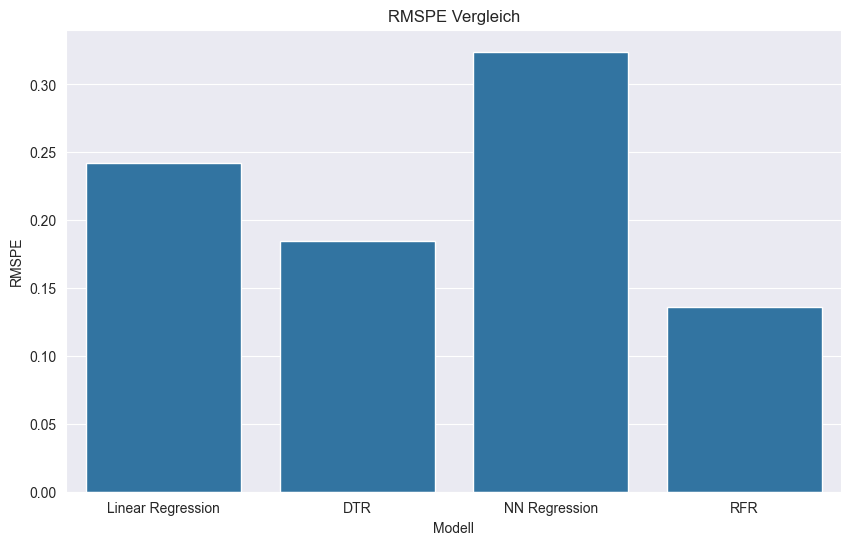

In [114]:
results = {
    "Modell": [],
    "RMSPE": [],
    "MSE": [],
    "R²": []
}

# Iteriere über die Modelle und sammle die Ergebnisse
for model_name, model in dict_models.items():
    mse, r2, rmspe_value = quick_model_testing(model, df_ml)
    results["Modell"].append(model_name)
    results["RMSPE"].append(rmspe_value)
    results["MSE"].append(mse)
    results["R²"].append(r2)

# Daten in ein DataFrame konvertieren
df_results = pd.DataFrame(results)

# Visualisierung der RMSPE-Werte
plt.figure(figsize=(10, 6))
sns.barplot(x="Modell", y="RMSPE", data=df_results)
plt.title("RMSPE Vergleich")
plt.xlabel("Modell")
plt.ylabel("RMSPE")
plt.show()

Wir sehen, dass das RandomForestRegressor-Modell (RFR) von den vier Modellen am besten abschneidet. Das Modell besitzt den kleinsten RMSPE und erklärt die meiste Varianz.
Das DTR-Modell eine etwas höheren MSE und einen leicht niedrigeren R²-Wert als der RTR, performt jedoch besser als der KNeighborsRegressor und das Lineare Regressionsmodell. 


## Refining und Hyperparameter optimieren

Ausgehend von den Ergebnissen unserer Modelle haben wir uns für den RandomForestRegressor entschieden. -> Anmerkung: Ggf. lieber nur ein Entscheidungsbaum nutzen? 

### RandomForestRegressor

Wir werden zunächst das Modell an unserem merged_df trainieren und ausgehend von dem Ergebnis, die Hyperparameter ändern. 

In [115]:
rfr = RandomForestRegressor(random_state=0)
rfr.get_params() #Ausgabe aller Hyperparameter
#Which parameter to chooses from: https://stats.stackexchange.com/questions/626744/which-hyperparameters-should-i-choose-to-tune-for-different-ml-models

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [116]:
merged_df

,Store,DayOfWeek,Day,Month,Year,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYears,Promo2Active,Promo2SinceWeek,Promo2SinceYear,AverageSalesLast7Days
844337,1097,2,1,1,2013,5961,1,0,1,1,1,1,720.0,11.0,0,0.0,0.0,5961
844321,85,2,1,1,2013,4220,1,0,1,1,1,0,1870.0,2.0,0,0.0,0.0,4220
844322,259,2,1,1,2013,6851,1,0,1,1,1,1,210.0,0.0,0,0.0,0.0,6851
844323,262,2,1,1,2013,17267,1,0,1,1,1,0,1180.0,0.0,0,0.0,0.0,17267
844324,274,2,1,1,2013,3102,1,0,1,1,1,1,3640.0,0.0,1,10.0,2013.0,3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,745,5,31,7,2015,8363,1,1,0,1,0,0,17650.0,2.0,1,37.0,2009.0,8459
744,746,5,31,7,2015,9082,1,1,0,1,3,2,4330.0,4.0,0,35.0,2011.0,7789
745,747,5,31,7,2015,10708,1,1,0,1,2,2,45740.0,7.0,0,0.0,0.0,9129
739,741,5,31,7,2015,11253,1,1,0,1,3,2,11900.0,0.0,0,0.0,0.0,9060


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer

# Benutzerdefinierten Scorer erstellen (höhere Werte sind schlechter, also verwenden wir "greater_is_better=False")
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Zielvariable (Sales)
target = merged_df["Sales"]

# Features (alle Spalten außer 'Sales')
X = merged_df.drop(columns=["Sales"])

# Split in Trainings- und Testdaten
X_train, X_test, target_train, target_test = train_test_split(X, target, 
                                                                test_size=0.3, random_state=3)
#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',0.5, 1]
}

# Perform Randomized Search for Random Forest Regressor
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=rf_params, n_iter=5, cv=5, random_state=42, scoring=rmspe_scorer)

# Fitting the model
rf_random_search.fit(X_train, target_train)

# Vorhersagen auf Testdaten
target_pred = rf_random_search.best_estimator_.predict(X_test)


# Optional: Ausgabe der besten Parameter nach Randomized Search
print(f"Beste Parameter: {rf_random_search.best_params_}")

# RMSPE je Iteration ausgeben
tuning_result = pd.DataFrame(rf_random_search.cv_results_)
rmspe_per_iteration = tuning_result[["mean_test_score", "std_test_score", "params"]]
print(rmspe_per_iteration)

#Quellen:
#https://www.kaggle.com/code/nargisbegum82/hyperparameter-tuning-in-random-forests


Beste Parameter: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
   mean_test_score  std_test_score  \
0        -0.244676        0.052553   
1        -0.185458        0.064174   
2        -0.188364        0.065477   
3        -0.246716        0.051439   
4        -0.186662        0.068649   

                                              params  
0  {'n_estimators': 20, 'min_samples_split': 5, '...  
1  {'n_estimators': 20, 'min_samples_split': 5, '...  
2  {'n_estimators': 20, 'min_samples_split': 2, '...  
3  {'n_estimators': 50, 'min_samples_split': 10, ...  
4  {'n_estimators': 100, 'min_samples_split': 10,...  


Wir prüfen nun, ob unser Modell zum Overfitting tendiert. 

In [61]:
#checking overfitting -> trainingsWert vs testWert
# Vorhersagen auf Trainingsdaten
target_train_pred = rf_random_search.best_estimator_.predict(X_train)

# RMSPE für Trainings- und Testdaten berechnen
rmspe_train = rmspe(target_train, target_train_pred)
rmspe_test = rmspe(target_test, target_pred)

print(f"RMSPE auf Trainingsdaten: {rmspe_train}")
print(f"RMSPE auf Testdaten: {rmspe_test}")

RMSPE auf Trainingsdaten: 0.10565760566809031
RMSPE auf Testdaten: 0.1336708311580857


Die RMSPE der Vorhersagen basierend auf den Trainings- und Testdaten sind nah beieinander. Das ist ein gutes Zeichen dafür, dass unser Modell sowohl auf bekannten (Trainingsdaten) als auch auf unbekannten Daten (Testdaten) gut generalisiert und zuverlässige Vorhersagen trifft.

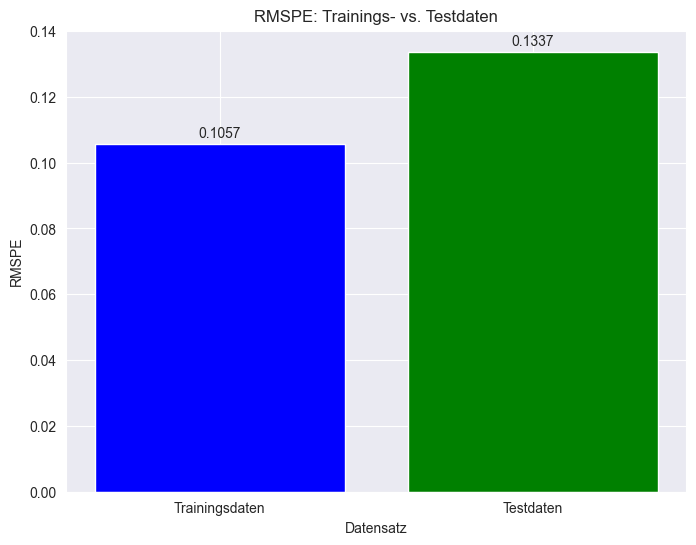

In [63]:
# RMSPE-Werte
rmspe_values = [rmspe_train, rmspe_test]
labels = ['Trainingsdaten', 'Testdaten']

# Balkendiagramm
plt.figure(figsize=(8, 6))
plt.bar(labels, rmspe_values, color=['blue', 'green'])

# Titel und Achsenbeschriftungen
plt.title('RMSPE: Trainings- vs. Testdaten')
plt.ylabel('RMSPE')
plt.xlabel('Datensatz')

# Werte über den Balken anzeigen
for i, v in enumerate(rmspe_values):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')

# Plot anzeigen
plt.show()

Auch der Scatterplot deutet darauf hin, dass unser Modell gut performt und gleichzeitig nicht overfittet.

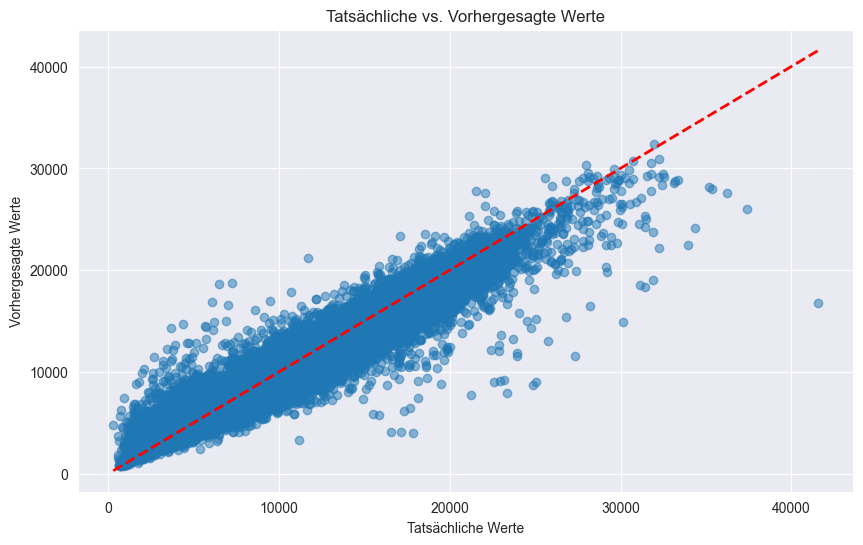

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, target_pred, alpha=0.5)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], "r--", lw=2)
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_random_search.best_estimator_, X_train, target_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
 

#### Feature Selection

Durch die Methode "feature_importances_" können wir uns ausgeben, welche Merkmale am einflussreichsten bzw. relevantesten für das Modell waren.

In [ ]:
feature_importance_rf_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_random_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))  # Optional: Setzt die Größe des Plots
ax = sns.barplot(data=feature_importance_rf_df, x='importance', y='feature')

# Titel hinzufügen
ax.set_title('Feature Importance of Random Forest', fontsize=16)

# Plot anzeigen
plt.show()

Um eine Entscheidung darüber zu treffen, welche Features möglicherweise irrelevant oder wenig hilfreich für das Modell sind, kann ein Random Feature (ein zufällig generiertes Merkmal ohne Informationsgehalt) in den Datensatz eingefügt werden. Dies ermöglicht es, die Bedeutung der tatsächlichen Features im Verhältnis zu einem vollständig zufälligen Merkmal zu bewerten.

Die Idee hinter diesem Ansatz ist es, ein Feature zu schaffen, das garantiert keinen Informationsgehalt besitzt. Dadurch lässt sich herausfinden, ob eines der existierenden Features in Wirklichkeit keinen relevanten Einfluss auf das Training des Modells hat, indem es in seiner Wichtigkeit nicht signifikant über dem zufälligen Feature liegt.

In [ ]:

X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = rf_random_search.best_estimator_
rf_random.fit(X_train_random, target_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
#Quelle: https://forecastegy.com/posts/feature-importance-in-random-forests/

In [ ]:
# Farben definieren: Rot für das "RANDOM"-Feature, Blau für die anderen
colors = ['red' if feature == 'RANDOM' else 'royalblue' for feature in global_importances_random.index]

# Plot
plt.figure(figsize=(10, 6))
global_importances_random.plot(kind='barh', color=colors)

# Titel und Beschriftungen hinzufügen
plt.title("Feature Importance (RandomForest) - including random feature", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Anzeigen
plt.tight_layout()
plt.show()

Jedes Feature, dessen Wichtigkeit unter oder nahe der des zufälligen Features liegt, ist potenziell irrelevant für das Modell. Diese Features könnten entfernt werden, um das Modell zu vereinfachen, ohne die Vorhersagegenauigkeit zu verschlechtern.

#### Predicting Sales for test.csv 

Wir laden unser test.csv als DF

In [ ]:
test_df = pd.read_csv("resources/test.csv")

Unser Test-Datensatz benötigt die selben Features, mit denen unser Modell trainiert wurde.

Nun nutzen wir unser Modell, um die Sales vorherzusagen.

In [ ]:
# Vorhersagen für den Test-Datensatz machen
test_df["Sales"] = rf_random_search.best_estimator_.predict(test_df)


Hier sind die vorhergesagten Sales.

In [ ]:
plt.figure(figsize=(10, 6))

# Liniendiagramm der Sales-Vorhersagen
plt.plot(test_df.index, test_df["Sales"], label="Vorhergesagte Sales", color="blue")

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Sales Predictions", fontsize=16)
plt.xlabel("Date", fontsize=12)  # Passe den Label entsprechend an (z.B. Date oder Zeit, falls vorhanden)
plt.ylabel("Sales", fontsize=12)

# Optional: Legende anzeigen
plt.legend()

# Layout optimieren und Diagramm anzeigen
plt.tight_layout()
plt.show()

## Decision Tree Regressor
Als zweites Modell wählen wir den decision tree regressor welcher als zweitbestes Modell aus unserem quick and dirty Test abgeschlossen hat.

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.get_params()


In [ ]:
#Zielvariable
y = merged_df['Sales']
#Train alle Spalten außer Sales
X = merged_df.drop(columns=['Sales'])
merged_df.info()


In [ ]:
#Feature Importance
X_train.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtr.fit(X_train, y_train)


In [ ]:
dtr.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

In [ ]:
sns.barplot(data=feature_importance_df, x='importance', y='feature')

In [ ]:
test_pred = dtr.predict(X_test)
print(test_pred)
#submission_df = pd.read_csv("resources/sample_submission.csv")
#submission_df['Sales'] = test_pred
#submission_df.to_csv("submission.csv")

# Notizen/To-dos

* Inspiriert von () können wir analysieren, welche feature den größten einfluss haben
* Ich würde empfehlen das wir anhand der Merkmale Forward Selection betreiben wie in der Vorlesung, und schauen inwiefern sich das Modell durch hinzufügen bestimmter Parameter verbessert
* Eventuell müssen wir den test.csv datensatz noch mit dem store datensatz mergen für die prediction am ende 
* im zuge dessen kann es auch sein das wir die parameter an den der train csv anpassen müssen
* Die test.csv schließt genau am Ende der train.csv an. Scheinbar ist die test.csv nur zum predicten gedacht,bietet aber keine Grundlage zum prüfen, ob wir richtig liegen bzw. unser Modell(wir können ja trotzdem einfach visualisieren, wie die Sales in Zukunft aussehen könnten)
* Wir sollten prüfen, ob TimeSeriesSplit nicht sinnvoller ist statt train_test_split

# Literaturverzeichnis

Géron, Aurélien (2019): Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol, UNITED STATES: O'Reilly Media, Incorporated. Online verfügbar unter http://ebookcentral.proquest.com/lib/htw-berlin/detail.action?docID=5892320.

GitHub (2024): handson-ml/ml-project-checklist.md at master · ageron/handson-ml. Online verfügbar unter https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md, zuletzt aktualisiert am 23.06.2024, zuletzt geprüft am 23.06.2024.

Merge, join, concatenate and compare — pandas 2.2.2 documentation (2024). Online verfügbar unter https://pandas.pydata.org/docs/user_guide/merging.html, zuletzt aktualisiert am 11.04.2024, zuletzt geprüft am 23.06.2024.

Rossmann Store Sales (2024). Online verfügbar unter https://www.kaggle.com/competitions/rossmann-store-sales/overview, zuletzt aktualisiert am 23.06.2024, zuletzt geprüft am 23.06.2024.

Rossmann Store Sales (2024). Online verfügbar unter https://www.kaggle.com/code/mustiztemiz/predict-rossman-store-sales, zuletzt aktualisiert am 21.09.2024, zuletzt geprüft am 21.09.2024.